In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
%matplotlib inline

## Introduction to Bayes' Theorem
In this lesson, we’ll learn about Bayes’ Theorem. Bayes’ Theorem is the basis of a branch of statistics called Bayesian Statistics, where we take prior knowledge into account before calculating new probabilities.

This allows us to find narrow solutions from a huge universe of possibilities. British mathematician Alan Turing used it to crack the German Enigma code during WWII. And now it is used in:

* Machine Learning
* Statistical Modeling
* A/B Testing
* Robotics

By the end of this lesson, you’ll be able to solve simple problems involving prior knowledge.

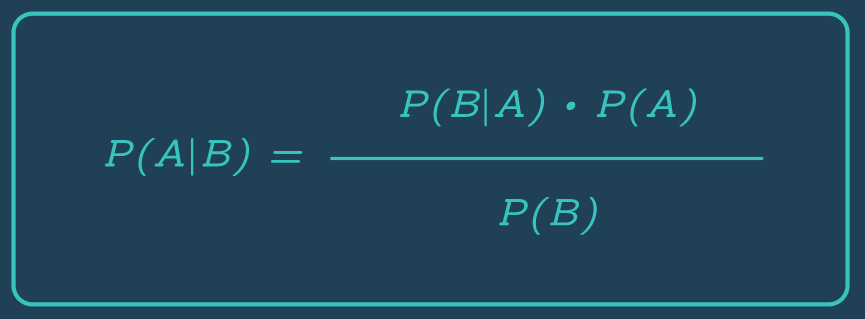

In [2]:
from IPython.display import Image
Image("first.png")

### Independent Events
The ability to determine whether two events are independent is an important skill for statistics.

If two events are independent, then the occurrence of one event does not affect the probability of the other event. Here are some examples of independent events:

* I wear a blue shirt; my coworker wears a blue shirt
* I take the subway to work; I eat sushi for lunch
* The NY Giants win their football game; the NY Rangers win their hockey game

If two events are dependent, then when one event occurs, the probability of the other event occurring changes in a predictable way.

Here are some examples of dependent events:
* It rains on Tuesday; I carry an umbrella on Tuesday
* I eat spaghetti; I have a red stain on my shirt
* I wear sunglasses; I go to the beach

## Ques 1
A certain family plans to have three children. Is the event that the couple’s third child is a girl independent of the event that the couple’s first two children are girls?

Save your answer ('independent' or 'not independent') to the variable third_child.

In [3]:
third_child = 'independent'
print(third_childrd_child)

independent


## Conditional Probability
Conditional probability is the probability that two events happen. It’s easiest to calculate conditional probability when the two events are independent.

`Note`: For the rest of this lesson, we’ll be using the statistical convention that the probability of an event is written as P(event).

If the probability of event A is P(A) and the probability of event B is P(B) and the two events are independent, then the probability of both events occurring is the product of the probabilities:



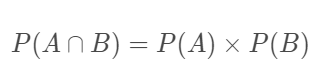

In [5]:
Image('second.png')

The symbol ∩ just means “and”, so P(A ∩ B) means the probability that both A and B happen.

For instance, suppose we are rolling a pair of dice, and want to know the probability of rolling two sixes.

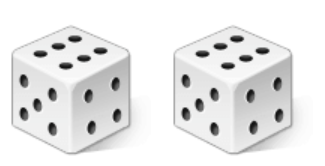

In [6]:
Image('three.png')

Each die has six sides, so the probability of rolling a six is 1/6. Each die is independent (i.e., rolling one six does not increase or decrease our chance of rolling a second six), so:

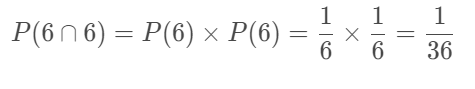

In [7]:
Image('four.png')

### Ques 
This week, there is a 30% probability that it will rain on any given day. At a certain high school, gym class is held on three days out of the five day school week.

On a school day, what is the probability that it is raining and the students have gym class?

Save your answer to the variable p_rain_and_gym.

P(rain) = 0.30

P(gym) = 3/5 = 0.60

* As these two events are independent :
  * P(rain and gym) = P(rain) * P(gym)

In [8]:
p_rain_and_gym = 0.30 * 0.60
print(p_rain_and_gym)

0.18


## Testing for a Rare Disease
Suppose you are a doctor and you need to test if a patient has a certain rare disease. The test is very accurate: it’s correct 99% of the time. The disease is very rare: only 1 in 100,000 patients have it.

You administer the test and it comes back positive, so your patient must have the disease, right?

Not necessarily. If we just consider the test, there is only a 1% chance that it is wrong, but we actually have more information: we know how rare the disease is.

Given that the test came back positive, there are two possibilities:

* The patient had the disease, and the test correctly diagnosed the disease.
* The patient didn’t have the disease and the test incorrectly diagnosed that they had the disease.

### Ques 1
What is the probability that the patient had the disease and the test correctly diagnosed the disease?

Save your answer to the variable p_disease_and_correct.

In [9]:
p_disease_and_correct = (1 / 100000) * (0.99)
print(p_disease_and_correct)

9.9e-06


### Ques 2
What is the probability that the patient does not have the disease and the test incorrectly diagnosed the disease?

Save your answer to the variable p_no_disease_and_incorrect.

In [11]:
p_no_disease_and_incorrect = (1 - 1 / 100000) * (0.01)
print(p_no_disease_and_incorrect)

0.0099999


## Bayes' Theorem

In the previous exercise, we determined two probabilities:

* The patient had the disease, and the test correctly diagnosed the disease ≈ 0.00001
* The patient didn’t have the disease and the test incorrectly diagnosed that they had the disease ≈ 0.01

Both events are rare, but we can see that it was about 1,000 times more likely that the test was incorrect than that the patient had this rare disease.

We’re able to come to this conclusion because we had more information than just the accuracy of the test; we also knew the prevalence of this disease. That extra information about how we expect the world to work is called a `prior`.

When we only use the first piece of information (the result of the test), it’s called a Frequentist Approach to statistics. When we incorporate our prior, it’s called a Bayesian Approach.

In statistics, if we have two events (A and B), we write the probability that event A will happen, given that event B already happened as P(A|B). In our example, we want to find P(rare disease | positive result). In other words, we want to find the probability that the patient has the disease given the test came back positive.

We can calculate P(A|B) using Bayes’ Theorem, which states:

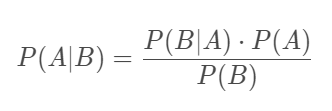

In [12]:
Image('five.png')

**P(rare disease| positive results) = P(positive results | rare disease) * P(rare disease) / P(positive results)**

It is important to note that on the right side of the equation, we have the term P(B|A). This is the probability that event B will happen given that event A has already happened. This is very different from P(A|B), which is the probability we are trying to solve for. The order matters!

### Ques 1
Calculate P(positive result | rare disease), or the probability of a positive test result, given that a patient really has this rare disease.

Save your answer (as a decimal) to p_positive_given_disease.

In [17]:
p_positive_given_disease = 0.99
print(p_positive_given_disease)

0.99


### Ques 2
What is P(rare disease), the probability that a randomly selected patient has the rare disease?

Save your answer to p_disease.

In [19]:
p_disease = (1 / 100000)
print(p_disease)

1e-05


### Ques 3

We now need to compute the denominator; we need to find P(positive result).

As we discussed previously, there are two ways to get a positive result:

The patient had the disease, and the test correctly diagnosed the disease.
The patient didn’t have the disease and the test incorrectly diagnosed that they had the disease.

Using these two probabilities, calculate the total probability that a randomly selected patient receives a positive test result, P(positive result).

Save your answer to the variable p_positive.

In [24]:
p_positive = (1.0 / 100000.0 * 0.99) + (99999.0 / 100000.0 * 0.01)
print(p_positive)

0.010009800000000001


### Ques 4
Substitute all three of these values into Bayes’ Theorem and calculate P(rare disease | positive result).

Save your result as p_disease_given_positive.

In [25]:
p_disease_given_positive = (p_positive_given_disease) * (p_disease) / p_positive
print(p_disease_given_positive)

0.0009890307498651321


## Spam Filters:

Let’s explore a different example. Email spam filters use Bayes’ Theorem to determine if certain words indicate that an email is spam.

Let’s a take word that often appears in spam: “enhancement”.

With just 3 facts, we can make some preliminary steps towards a good spam filter:
* “enhancement” appears in just 0.1% of non-spam emails
* “enhancement” appears in 5% of spam emails
* Spam emails make up about 20% of total emails

Given that an email contains “enhancement”, what is the probability that the email is spam?

### Ques 1
In this example, we are dealing with two probabilities:
    * P(enhancement) - the probability that the word “enhancement” appears in an email.
    * P(spam) - the probability that an email is spam.
    
Using Bayes’ Theorem to answer our question means that we want to calculate P(A|B).

But what are A and B referring to in this case?

* Save the string 'enhancement' or 'spam' to the variable a.
* Save the string 'enhancement' or 'spam' to the variable b.

In [28]:
a = 'spam'
b = 'enhancement'

###  Ques 2 
What is P(spam)?

Save your answer to p_spam.

In [29]:
p_spam = 0.2
print(p_spam)

0.2


### Ques 3
What is P(enhancement | spam)?

Save your answer to 
* `p_enhancement_given_spam`.

In [31]:
p_enhancement_given_spam = 0.5
print(p_enhancement_given_spam)

0.5


### Ques 4
We want to know the overall probability that any email (spam or non-spam) contains “enhancement”.

Because we know the probability of “enhancement” occurring in both spam (0.05) and non-spam (0.001) emails, we can use a weighted average to calculate the probability of “enhancement” occurring in an email:

en = `enhancement`

P(en) = P(en|spam) * P(spam) + P(enhancemen|not spam) * P(not spma)

Save your answer to p_enhancement.

In [33]:
p_enhancement = 0.05 * 0.2 + 0.001 * (1 - 0.2)
print(p_enhancement)

0.010800000000000002


### Ques 5 
Now that we know:

* P(spam)
* P(enhancement | spam)
* P(enhancement)

We can plug this into Bayes’ Theorem:

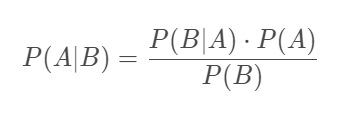

In [34]:
Image('seven.png')

Save your answer as p_spam_enhancement.

In [36]:
p_spam_enhancement = p_enhancement_given_spam * p_spam / p_enhancement

print (p_spam_enhancement)

9.259259259259258
